In [2]:
# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
import pandas_profiling
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
warnings.filterwarnings('ignore')
import graphviz

C:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_csv("wine.csv", sep=";")

# Exploratory Data Analysis

In [3]:
df.head()
df.tail()
df.sample()
df.info()
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1314,6.4,0.31,0.4,6.2,0.04,46.0,169.0,0.9953,3.15,0.46,9.3,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# Removing the Column name space

In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.columns= ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

In [6]:
df.columns
df.info()
df.head()
df.shape

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed_acidity           4898 non-null float64
volatile_acidity        4898 non-null float64
citric_acid             4898 non-null float64
residual_sugar          4898 non-null float64
chlorides               4898 non-null float64
free_sulfur_dioxide     4898 non-null float64
total_sulfur_dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


(4898, 12)

# Distribution of wine qulity

In [7]:
df.groupby('quality').size()

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64

# Binning the wine quality

In [8]:
bins = (2,5,6,9)
names = [1,2,3]
df['quality_type'] = pd.cut(df['quality'], bins=bins, labels=names)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
fixed_acidity           4898 non-null float64
volatile_acidity        4898 non-null float64
citric_acid             4898 non-null float64
residual_sugar          4898 non-null float64
chlorides               4898 non-null float64
free_sulfur_dioxide     4898 non-null float64
total_sulfur_dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
quality_type            4898 non-null category
dtypes: category(1), float64(11), int64(1)
memory usage: 464.2 KB


In [10]:
df.groupby('quality_type').size()

quality_type
1    1640
2    2198
3    1060
dtype: int64

# Converting quality_type from categorial to numeric 

In [11]:
df['quality_type'] = pd.to_numeric(df['quality_type'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
fixed_acidity           4898 non-null float64
volatile_acidity        4898 non-null float64
citric_acid             4898 non-null float64
residual_sugar          4898 non-null float64
chlorides               4898 non-null float64
free_sulfur_dioxide     4898 non-null float64
total_sulfur_dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
quality_type            4898 non-null int64
dtypes: float64(11), int64(2)
memory usage: 497.5 KB


# Generating Pandas Profiling

In [13]:
import pandas_profiling
eda_report = pandas_profiling.ProfileReport(df)
eda_report.to_file("quality_eda.html")

# Feature Selection

In [14]:
X = df.drop(['quality','quality_type'],axis=1, inplace=False)
y = df['quality_type']

In [15]:
X.shape
y.shape
X.columns

(4898, 11)

(4898,)

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [17]:
n_estimators = [10,500,1000,2000]
creterian = ['gini','entropy']
min_samples_split = [2,10,20,50,100]
max_depth = [20,30,40,50, None]

# Building Random Forest Model

In [18]:
param_grid = {'n_estimators': n_estimators, 'creterian': creterian, 'min_samples_split':min_samples_split, 'max_depth':max_depth}
rf = RandomForestClassifier()
rf_g = RandomizedSearchCV(rf,param_grid,n_jobs=-1, cv=5,verbose=2, scoring='accuracy' )
rf_g.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Anaconda\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...onda\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Anaconda\lib\runpy.py in _run_code(code=<code object <module> at 0x0000021DE7A81DB0, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Anaconda\lib\site-packages\__pycache__\ipykernel_launcher.cpython-37.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Anaconda\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...onda\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Anaconda\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...onda\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x0000021DE7A81DB0, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Anaconda\lib\site-packages\__pycache__\ipykernel_launcher.cpython-37.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Anaconda\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...onda\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Anaconda\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Anaconda\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Anaconda\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Anaconda\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    494         if self.poller is not None:
    495             self.poller.start()
    496         self.kernel.start()
    497         self.io_loop = ioloop.IOLoop.current()
    498         try:
--> 499             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    500         except KeyboardInterrupt:
    501             pass
    502 
    503 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Anaconda\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    127         except (RuntimeError, AssertionError):
    128             old_loop = None
    129         try:
    130             self._setup_logging()
    131             asyncio.set_event_loop(self.asyncio_loop)
--> 132             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    133         finally:
    134             asyncio.set_event_loop(old_loop)
    135 
    136     def stop(self):

...........................................................................
C:\Anaconda\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    518         sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    519                                finalizer=self._asyncgen_finalizer_hook)
    520         try:
    521             events._set_running_loop(self)
    522             while True:
--> 523                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    524                 if self._stopping:
    525                     break
    526         finally:
    527             self._stopping = False

...........................................................................
C:\Anaconda\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1753                         logger.warning('Executing %s took %.3f seconds',
   1754                                        _format_handle(handle), dt)
   1755                 finally:
   1756                     self._current_handle = None
   1757             else:
-> 1758                 handle._run()
        handle._run = <bound method Handle._run of <Handle IOLoop._run_callback(functools.par...021DEECEF268>))>>
   1759         handle = None  # Needed to break cycles when an exception occurs.
   1760 
   1761     def _set_coroutine_origin_tracking(self, enabled):
   1762         if bool(enabled) == bool(self._coroutine_origin_tracking_enabled):

...........................................................................
C:\Anaconda\lib\asyncio\events.py in _run(self=<Handle IOLoop._run_callback(functools.par...021DEECEF268>))>)
     83     def cancelled(self):
     84         return self._cancelled
     85 
     86     def _run(self):
     87         try:
---> 88             self._context.run(self._callback, *self._args)
        self._context.run = <built-in method run of Context object>
        self._callback = <bound method IOLoop._run_callback of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021DEECEF268>),)
     89         except Exception as exc:
     90             cb = format_helpers._format_callback_source(
     91                 self._callback, self._args)
     92             msg = f'Exception in callback {cb}'

...........................................................................
C:\Anaconda\lib\site-packages\tornado\ioloop.py in _run_callback(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, callback=functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021DEECEF268>))
    753         """Runs a callback with error handling.
    754 
    755         For use in subclasses.
    756         """
    757         try:
--> 758             ret = callback()
        ret = undefined
        callback = functools.partial(<function wrap.<locals>.null_wrapper at 0x0000021DEECEF268>)
    759             if ret is not None:
    760                 from tornado import gen
    761                 # Functions that return Futures typically swallow all
    762                 # exceptions and store them in the Future.  If a Future

...........................................................................
C:\Anaconda\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = ()
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
C:\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py in <lambda>()
    531             return
    532 
    533         if state & self.socket.events:
    534             # events still exist that haven't been processed
    535             # explicitly schedule handling to avoid missing events due to edge-triggered FDs
--> 536             self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
    537 
    538     def _init_io_state(self):
    539         """initialize the ioloop event handler"""
    540         with stack_context.NullContext():

...........................................................................
C:\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=0)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\Anaconda\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
C:\Anaconda\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Anaconda\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': "param_grid = {'n_estimators': n_estimators, 'cre..., scoring='accuracy' )\nrf_g.fit(X_train, y_train)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 7, 20, 6, 39, 22, 966493, tzinfo=tzutc()), 'msg_id': 'b3290b9efdd84b4e801077c295fd76ea', 'msg_type': 'execute_request', 'session': '9a1a0fb7828b4d1988253b3ec49f4b82', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'b3290b9efdd84b4e801077c295fd76ea', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warning("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'9a1a0fb7828b4d1988253b3ec49f4b82']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': "param_grid = {'n_estimators': n_estimators, 'cre..., scoring='accuracy' )\nrf_g.fit(X_train, y_train)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 7, 20, 6, 39, 22, 966493, tzinfo=tzutc()), 'msg_id': 'b3290b9efdd84b4e801077c295fd76ea', 'msg_type': 'execute_request', 'session': '9a1a0fb7828b4d1988253b3ec49f4b82', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'b3290b9efdd84b4e801077c295fd76ea', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\Anaconda\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'9a1a0fb7828b4d1988253b3ec49f4b82'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': "param_grid = {'n_estimators': n_estimators, 'cre..., scoring='accuracy' )\nrf_g.fit(X_train, y_train)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 7, 20, 6, 39, 22, 966493, tzinfo=tzutc()), 'msg_id': 'b3290b9efdd84b4e801077c295fd76ea', 'msg_type': 'execute_request', 'session': '9a1a0fb7828b4d1988253b3ec49f4b82', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'b3290b9efdd84b4e801077c295fd76ea', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Anaconda\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code="param_grid = {'n_estimators': n_estimators, 'cre..., scoring='accuracy' )\nrf_g.fit(X_train, y_train)", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = "param_grid = {'n_estimators': n_estimators, 'cre..., scoring='accuracy' )\nrf_g.fit(X_train, y_train)"
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\Anaconda\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=("param_grid = {'n_estimators': n_estimators, 'cre..., scoring='accuracy' )\nrf_g.fit(X_train, y_train)",), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ("param_grid = {'n_estimators': n_estimators, 'cre..., scoring='accuracy' )\nrf_g.fit(X_train, y_train)",)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="param_grid = {'n_estimators': n_estimators, 'cre..., scoring='accuracy' )\nrf_g.fit(X_train, y_train)", store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = "param_grid = {'n_estimators': n_estimators, 'cre..., scoring='accuracy' )\nrf_g.fit(X_train, y_train)"
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="param_grid = {'n_estimators': n_estimators, 'cre..., scoring='accuracy' )\nrf_g.fit(X_train, y_train)", store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'all'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>], cell_name='<ipython-input-18-c38565309939>', interactivity='all', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 21deecafef0, executio...rue silent=False shell_futures=True> result=None>)
   2902                     return True
   2903 
   2904             for i, node in enumerate(to_run_interactive):
   2905                 mod = ast.Interactive([node])
   2906                 code = compiler(mod, cell_name, "single")
-> 2907                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x0000021DEEED7030, file "<ipython-input-18-c38565309939>", line 4>
        result = <ExecutionResult object at 21deecafef0, executio...rue silent=False shell_futures=True> result=None>
   2908                     return True
   2909 
   2910             # Flush softspace
   2911             if softspace(sys.stdout, 0):

...........................................................................
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x0000021DEEED7030, file "<ipython-input-18-c38565309939>", line 4>, result=<ExecutionResult object at 21deecafef0, executio...rue silent=False shell_futures=True> result=None>)
   2956         outflag = True  # happens in more places, so it's easier as default
   2957         try:
   2958             try:
   2959                 self.hooks.pre_run_code_hook()
   2960                 #rprint('Running code', repr(code_obj)) # dbg
-> 2961                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x0000021DEEED7030, file "<ipython-input-18-c38565309939>", line 4>
        self.user_global_ns = {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "import numpy as np\nimport pandas as pd\nimport ma...warnings.filterwarnings('ignore')\nimport graphviz", 'df = pd.read_csv("wine.csv", sep=";")', 'df.head()\ndf.tail()\ndf.sample()\ndf.info()\ndf.describe()', 'df.columns', "df.columns= ['fixed_acidity', 'volatile_acidity'...,\n       'pH', 'sulphates', 'alcohol', 'quality']", 'df.columns\ndf.info()\ndf.head()\ndf.shape', "df.groupby('quality').size()", "bins = (2,5,6,9)\nnames = [1,2,3]\ndf['quality_type'] = pd.cut(df['quality'], bins=bins, labels=names)", 'df.info()', "df.groupby('quality_type').size()", "df['quality_type'] = pd.to_numeric(df['quality_type'])", 'df.info()', 'import pandas_profiling\neda_report = pandas_prof...Report(df)\neda_report.to_file("quality_eda.html")', "X = df.drop(['quality','quality_type'],axis=1, inplace=False)\ny = df['quality_type']", 'X.shape\ny.shape\nX.columns', 'X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)', "n_estimators = [10,500,1000,2000]\ncreterian = ['... [2,10,20,50,100]\nmax_depth = [20,30,40,50, None]", "param_grid = {'n_estimators': n_estimators, 'cre..., scoring='accuracy' )\nrf_g.fit(X_train, y_train)"], 'InteractiveShell': <class 'IPython.core.interactiveshell.InteractiveShell'>, 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'Out': {3:        fixed acidity  volatile acidity  citric a...3.820000     1.080000    14.200000     9.000000  , 4: Index(['fixed acidity', 'volatile acidity', 'cit...es', 'alcohol', 'quality'],
      dtype='object'), 6: (4898, 12), 7: quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64, 10: quality_type
1    1640
2    2198
3    1060
dtype: int64, 15: Index(['fixed_acidity', 'volatile_acidity', 'cit...', 'sulphates', 'alcohol'],
      dtype='object')}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'RandomizedSearchCV': <class 'sklearn.model_selection._search.RandomizedSearchCV'>, 'X':       fixed_acidity  volatile_acidity  citric_ac...000  
4897  11.800000  

[4898 rows x 11 columns], 'X_test':       fixed_acidity  volatile_acidity  citric_ac...000  
32    10.800000  

[1225 rows x 11 columns], 'X_train':       fixed_acidity  volatile_acidity  citric_ac... 10.6  
860      10.4  

[3673 rows x 11 columns], ...}
        self.user_ns = {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "import numpy as np\nimport pandas as pd\nimport ma...warnings.filterwarnings('ignore')\nimport graphviz", 'df = pd.read_csv("wine.csv", sep=";")', 'df.head()\ndf.tail()\ndf.sample()\ndf.info()\ndf.describe()', 'df.columns', "df.columns= ['fixed_acidity', 'volatile_acidity'...,\n       'pH', 'sulphates', 'alcohol', 'quality']", 'df.columns\ndf.info()\ndf.head()\ndf.shape', "df.groupby('quality').size()", "bins = (2,5,6,9)\nnames = [1,2,3]\ndf['quality_type'] = pd.cut(df['quality'], bins=bins, labels=names)", 'df.info()', "df.groupby('quality_type').size()", "df['quality_type'] = pd.to_numeric(df['quality_type'])", 'df.info()', 'import pandas_profiling\neda_report = pandas_prof...Report(df)\neda_report.to_file("quality_eda.html")', "X = df.drop(['quality','quality_type'],axis=1, inplace=False)\ny = df['quality_type']", 'X.shape\ny.shape\nX.columns', 'X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)', "n_estimators = [10,500,1000,2000]\ncreterian = ['... [2,10,20,50,100]\nmax_depth = [20,30,40,50, None]", "param_grid = {'n_estimators': n_estimators, 'cre..., scoring='accuracy' )\nrf_g.fit(X_train, y_train)"], 'InteractiveShell': <class 'IPython.core.interactiveshell.InteractiveShell'>, 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'Out': {3:        fixed acidity  volatile acidity  citric a...3.820000     1.080000    14.200000     9.000000  , 4: Index(['fixed acidity', 'volatile acidity', 'cit...es', 'alcohol', 'quality'],
      dtype='object'), 6: (4898, 12), 7: quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64, 10: quality_type
1    1640
2    2198
3    1060
dtype: int64, 15: Index(['fixed_acidity', 'volatile_acidity', 'cit...', 'sulphates', 'alcohol'],
      dtype='object')}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'RandomizedSearchCV': <class 'sklearn.model_selection._search.RandomizedSearchCV'>, 'X':       fixed_acidity  volatile_acidity  citric_ac...000  
4897  11.800000  

[4898 rows x 11 columns], 'X_test':       fixed_acidity  volatile_acidity  citric_ac...000  
32    10.800000  

[1225 rows x 11 columns], 'X_train':       fixed_acidity  volatile_acidity  citric_ac... 10.6  
860      10.4  

[3673 rows x 11 columns], ...}
   2962             finally:
   2963                 # Reset our crash handler in place
   2964                 sys.excepthook = old_excepthook
   2965         except SystemExit as e:

...........................................................................
C:\Users\Ashish Chandra\Desktop\Python\Reva\KNN\<ipython-input-18-c38565309939> in <module>()
      1 param_grid = {'n_estimators': n_estimators, 'creterian': creterian, 'min_samples_split':min_samples_split, 'max_depth':max_depth}
      2 rf = RandomForestClassifier()
      3 rf_g = RandomizedSearchCV(rf,param_grid,n_jobs=-1, cv=5,verbose=2, scoring='accuracy' )
----> 4 rf_g.fit(X_train, y_train)

...........................................................................
C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py in fit(self=RandomizedSearchCV(cv=5, error_score='raise',
  ...rain_score='warn', scoring='accuracy', verbose=2), X=      fixed_acidity  volatile_acidity  citric_ac... 10.6  
860      10.4  

[3673 rows x 11 columns], y=2835    2
1157    2
744     1
1448    2
3338    ... 3
Name: quality_type, Length: 3673, dtype: int64, groups=None, **fit_params={})
    635                                   return_train_score=self.return_train_score,
    636                                   return_n_test_samples=True,
    637                                   return_times=True, return_parameters=False,
    638                                   error_score=self.error_score)
    639           for parameters, (train, test) in product(candidate_params,
--> 640                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=5, random_state=None, shuffle=False)>
        X =       fixed_acidity  volatile_acidity  citric_ac... 10.6  
860      10.4  

[3673 rows x 11 columns]
        y = 2835    2
1157    2
744     1
1448    2
3338    ... 3
Name: quality_type, Length: 3673, dtype: int64
        groups = None
    641 
    642         # if one choose to see train score, "out" will contain train score info
    643         if self.return_train_score:
    644             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
C:\Anaconda\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Sat Jul 20 12:09:39 2019
PID: 12460                             Python 3.7.0: C:\Anaconda\python.exe
...........................................................................
C:\Anaconda\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False),       fixed_acidity  volatile_acidity  citric_ac....22       0.63     10.4

[3673 rows x 11 columns], 2835    2
1157    2
744     1
1448    2
3338    ... 3
Name: quality_type, Length: 3673, dtype: int64, {'score': make_scorer(accuracy_score)}, array([ 707,  710,  711, ..., 3670, 3671, 3672]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...,
       746, 749, 750, 752, 757, 765, 768, 770]), 2, {'creterian': 'entropy', 'max_depth': 50, 'min_samples_split': 20, 'n_estimators': 1000}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Anaconda\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False),       fixed_acidity  volatile_acidity  citric_ac....22       0.63     10.4

[3673 rows x 11 columns], 2835    2
1157    2
744     1
1448    2
3338    ... 3
Name: quality_type, Length: 3673, dtype: int64, {'score': make_scorer(accuracy_score)}, array([ 707,  710,  711, ..., 3670, 3671, 3672]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...,
       746, 749, 750, 752, 757, 765, 768, 770]), 2, {'creterian': 'entropy', 'max_depth': 50, 'min_samples_split': 20, 'n_estimators': 1000})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), X=      fixed_acidity  volatile_acidity  citric_ac....22       0.63     10.4

[3673 rows x 11 columns], y=2835    2
1157    2
744     1
1448    2
3338    ... 3
Name: quality_type, Length: 3673, dtype: int64, scorer={'score': make_scorer(accuracy_score)}, train=array([ 707,  710,  711, ..., 3670, 3671, 3672]), test=array([  0,   1,   2,   3,   4,   5,   6,   7,  ...,
       746, 749, 750, 752, 757, 765, 768, 770]), verbose=2, parameters={'creterian': 'entropy', 'max_depth': 50, 'min_samples_split': 20, 'n_estimators': 1000}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    439                       for k, v in fit_params.items()])
    440 
    441     test_scores = {}
    442     train_scores = {}
    443     if parameters is not None:
--> 444         estimator.set_params(**parameters)
        estimator.set_params = <bound method BaseEstimator.set_params of Random...e=None, verbose=0,
            warm_start=False)>
        parameters = {'creterian': 'entropy', 'max_depth': 50, 'min_samples_split': 20, 'n_estimators': 1000}
    445 
    446     start_time = time.time()
    447 
    448     X_train, y_train = _safe_split(estimator, X, y, train)

...........................................................................
C:\Anaconda\lib\site-packages\sklearn\base.py in set_params(self=RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), **params={'creterian': 'entropy', 'max_depth': 50, 'min_samples_split': 20, 'n_estimators': 1000})
    269             key, delim, sub_key = key.partition('__')
    270             if key not in valid_params:
    271                 raise ValueError('Invalid parameter %s for estimator %s. '
    272                                  'Check the list of available parameters '
    273                                  'with `estimator.get_params().keys()`.' %
--> 274                                  (key, self))
        key = 'creterian'
        self = RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False)
    275 
    276             if delim:
    277                 nested_params[key][sub_key] = value
    278             else:

ValueError: Invalid parameter creterian for estimator RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.
___________________________________________________________________________

# HYperparameter Tuning

In [ ]:
rf_g.best_estimator_

# Best Accuracy Score using Above Parameter

In [ ]:
rf_g.best_score_

# Model Performance Evaluation

In [ ]:
metrics.accuracy_score(predicted,y_test)

In [ ]:
print(metrics.classification_report(predicted, y_test))

# Confussion Matrix
print('Confussion Matrix')
cf = metrics.confusion_matrix(predicted,y_test)
lb11 = ['P1', 'P2', 'P3']
lb12 = ['T1', 'T2', 'T3']
sns.heatmap(cf, annot=True,cmap = 'Blues',fmt ='d',xticklabels = lb11, yticklabels = lb12)
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

clf_knn = KNeighborsClassifier(n_neighbors = 10)
clf_knn = clf_knn.fit(X_train, y_train)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
list_k = [3,5,7,9,11,13,15,20]

for k in list_k:
    clf_knn = KNeighborsClassifier(n_neighbors=k)
    score_knn = cross_val_score(clf_knn, X_test, y_test, cv=5)
    print(k)

In [22]:
y_pred = clf_knn.predict(X_test)
y_pred = logreg.predict(y_pred,y_test )
print(metrics.classification_report(y_pred, y_test))

TypeError: predict() takes 2 positional arguments but 3 were given

Confussion Matrix


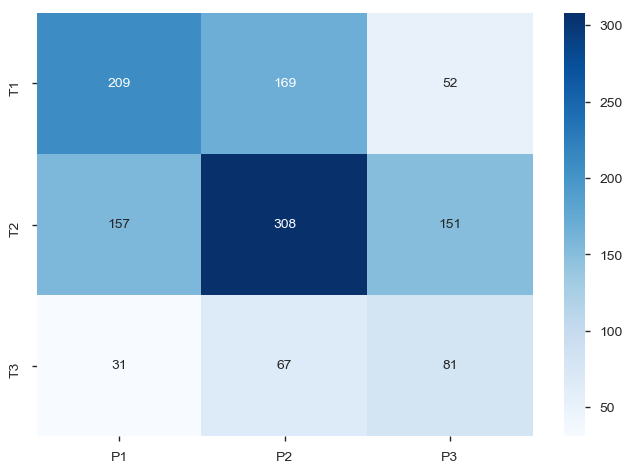

In [23]:
# Confussion Matrix
print('Confussion Matrix')
cf = metrics.confusion_matrix(y_pred,y_test)
lb11 = ['P1', 'P2', 'P3']
lb12 = ['T1', 'T2', 'T3']
sns.heatmap(cf, annot=True,cmap = 'Blues',fmt ='d',xticklabels = lb11, yticklabels = lb12)
plt.show()

# Feature Importance

In [ ]:
#clf.feature_importances_
#X.columns
#features = pd.DataFrame(clf.feature_importances_, X.columns)
#features
#features.columns = ['Importance']
#features

In [ ]:
#dot_data1 = tree.export_graphviz(clf, out_file='winetree.dot',
                                feature_names=X.columns,
                                rounded=True,
                                filled=True,special_characters=True)

# Hyperparameter tuning using cross validation and gridsearch

In [ ]:
creterian = ['gini','entropy']
min_samples_split = [2,10,20,50,100]
max_depth = [20,30,40,50,None]

In [ ]:
clf.get_params().keys()

In [ ]:
params_grid = {'criterion':creterian, 'min_samples_split': min_samples_split ,  'max_depth': max_depth}

In [ ]:
dt_g = GridSearchCV(clf, params_grid,n_jobs=-1, cv=5,verbose=2, scoring='accuracy')
dt_g.fit(X_train, y_train)

In [ ]:
dt_g.best_estimator_

In [ ]:
dt_g.best_score_

In [ ]:
dt_g.best_index_

In [ ]:
cv = pd.DataFrame(dt_g.cv_results_)

In [ ]:
cv

In [ ]:
cv.to_csv('CV_Results.csv')

In [ ]:
predicted = dt_g.predict(X_test)
metrics.accuracy_score(predicted, y_test)
print(metrics.classification_report(predicted, y_test))

# Confussion Matrix
print('Confussion Matrix')
cf = metrics.confusion_matrix(predicted,y_test)
lb11 = ['P1', 'P2', 'P3']
lb12 = ['T1', 'T2', 'T3']
sns.heatmap(cf, annot=True,cmap = 'Blues',fmt ='d',xticklabels = lb11, yticklabels = lb12)
plt.show()